In [49]:
import pandas as pd
A = pd.read_csv("F:/DS Notes/DS_Course_Lectures/DS1_Course_Lectures/Notes/Data sets/Cars93.csv")

In [50]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [51]:
Y = A[["Type"]]
A = A.drop(labels=["Unnamed: 0","Make","Model","Manufacturer","Type"],axis=1)

In [6]:
A.head(1)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra


In [7]:
B = A[["Price","MPG.city"]]

In [8]:
B.head()

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22


In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
results = km.fit(B)

In [10]:
results.labels_

array([2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2])

In [21]:
B['cluster'] = results.labels_

<ipython-input-21-2bf158a9258f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster'] = results.labels_


In [22]:
B.head(3)

,Price,MPG.city,cluster
0,15.9,25,2
1,33.9,18,1
2,29.1,20,1


In [23]:
q = {0:"blue",1:"red",2:"green"}

In [24]:
color = []
for i in B.cluster:
    color.append(q[i])

In [26]:
B['color']=color

<ipython-input-26-4719ee265a22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['color']=color


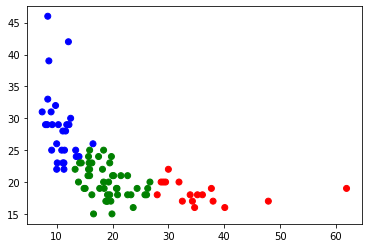

In [27]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.city'],c=B['color'])

In [28]:
B = A[["Price","MPG.city"]]
WCSS = []
k = range(2,20,1)

for i in k:
    km = KMeans(n_clusters=i)
    results = km.fit(B)
    WCSS.append(results.inertia_)

In [29]:
WCSS

[5300.007898550725,
 3074.854378501399,
 2166.8254423292274,
 1474.9304180107524,
 1069.8733763440862,
 797.5557119883528,
 641.8504201671709,
 542.1747183251532,
 463.06619269619256,
 405.1982814407815,
 356.72387423687434,
 315.41206349206357,
 301.192095959596,
 260.50056349206346,
 229.96417338217344,
 216.03269444444433,
 191.09179292929286,
 184.07473809523808]

([<matplotlib.axis.XTick at 0x2100c60f400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

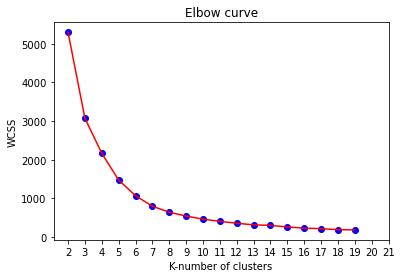

In [30]:
plt.scatter(k,WCSS,c="blue")
plt.plot(k,WCSS,c="red")
plt.xlabel("K-number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(2,22,1))

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
trres = km.fit(B)

In [34]:
trres.labels_

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0])

In [35]:
len(trres.labels_)

93

In [36]:
B['cluster_cartype'] = trres.labels_


<ipython-input-36-79e1bfbeb945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster_cartype'] = trres.labels_


In [37]:
B['Car_model']=A.Model

<ipython-input-37-723af5f362fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Car_model']=A.Model


In [38]:
B.sort_values(by="cluster_cartype")

,Price,MPG.city,cluster_cartype,Car_model
0,15.9,25,0,Integra
36,20.2,21,0,Taurus
37,20.9,18,0,Crown_Victoria
40,19.8,24,0,Prelude
42,17.5,24,0,Accord
...,...,...,...,...
63,11.8,29,2,Sentra
67,13.5,24,2,Achieva
12,11.4,25,2,Corsica
72,9.0,31,2,LeMans


Text(0, 0.5, 'Mileage')

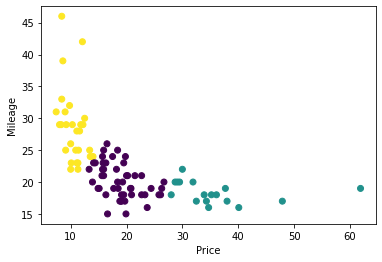

In [39]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.cluster_cartype)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [40]:
q = {0:"red",1:"blue",2:"black"}

In [42]:
col=[]
for i in B.cluster_cartype:
    col.append(q[i])

In [43]:
col

['red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'red',
 'red',
 'black',
 'red',
 'black',
 'black',
 'black',
 'red',
 'black',
 'red',
 'red',
 'red',
 'black',
 'black',
 'red',
 'black',
 'red',
 'black',
 'black',
 'black',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'black',
 'red',
 'black',
 'red',
 'red',
 'red',
 'black',
 'red',
 'red',
 'red',
 'red',
 'black',
 'black',
 'red',
 'red',
 'red',
 'blue',
 'black',
 'black',
 'black',
 'red',
 'black',
 'black',
 'red',
 'red',
 'red',
 'black',
 'red',
 'red',
 'red',
 'red',
 'red']

In [44]:
B['color']=col

<ipython-input-44-3e55e527f280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['color']=col


Text(0, 0.5, 'Mileage')

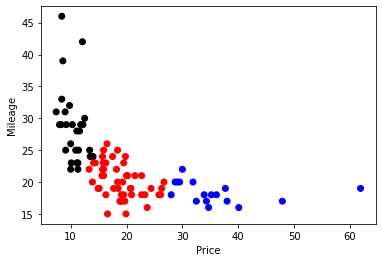

In [45]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.color)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [52]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [55]:
from pandas import get_dummies
X = A[con].join(get_dummies(A[cat]))

In [56]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [57]:
replacer(X)

# Training & Testing The Model

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=17)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=30)

In [60]:
model = abc.fit(xtrain,ytrain)

C:\Users\HP\Anacon -3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
pred = model.predict(xtest)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7894736842105263